# Find the Peak Season and Off Season for the year 2020

In [1]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [2]:
airbnb=pd.read_csv("calendar_athens.csv")
airbnb.columns

airbnb.price =airbnb.price.str.replace('$', '').str.replace(',', '').astype(float).astype(int)
airbnb.price.isna().sum()

<ipython-input-2-a0bed25497fd>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  airbnb.price =airbnb.price.str.replace('$', '').str.replace(',', '').astype(float).astype(int)


0

In [3]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3497466 entries, 0 to 3497465
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           int32  
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int32(1), int64(1), object(3)
memory usage: 173.4+ MB


In [4]:
np.sum(airbnb.isna())


listing_id        0
date              0
available         0
price             0
adjusted_price    0
minimum_nights    5
maximum_nights    5
dtype: int64

In [5]:
airbnb[airbnb.price!=airbnb.adjusted_price]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,725215,2021-10-25,f,49,$44.00,2.0,1125.0
1,10595,2021-10-26,f,100,$100.00,2.0,1125.0
2,10595,2021-10-27,f,100,$100.00,2.0,1125.0
3,10595,2021-10-28,f,70,$70.00,2.0,1125.0
4,10595,2021-10-29,f,70,$70.00,2.0,1125.0
...,...,...,...,...,...,...,...
3497461,52248288,2022-10-21,t,21,$21.00,1.0,365.0
3497462,52248288,2022-10-22,t,21,$21.00,1.0,365.0
3497463,52248288,2022-10-23,t,21,$21.00,1.0,365.0
3497464,52248288,2022-10-24,t,21,$21.00,1.0,365.0


In [6]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3497466 entries, 0 to 3497465
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           int32  
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int32(1), int64(1), object(3)
memory usage: 173.4+ MB


In [7]:
airbnb.listing_id.nunique()

9582

In [8]:
airbnb['adjusted_price'] = airbnb['adjusted_price'].str.replace(',', '')
airbnb['adjusted_price'] = airbnb['adjusted_price'].str.replace('$', '')
airbnb['adjusted_price'] =airbnb['adjusted_price'].astype(float)

<ipython-input-8-9da6fd5f39e0>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  airbnb['adjusted_price'] = airbnb['adjusted_price'].str.replace('$', '')


In [9]:
airbnb

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,725215,2021-10-25,f,49,44.0,2.0,1125.0
1,10595,2021-10-26,f,100,100.0,2.0,1125.0
2,10595,2021-10-27,f,100,100.0,2.0,1125.0
3,10595,2021-10-28,f,70,70.0,2.0,1125.0
4,10595,2021-10-29,f,70,70.0,2.0,1125.0
...,...,...,...,...,...,...,...
3497461,52248288,2022-10-21,t,21,21.0,1.0,365.0
3497462,52248288,2022-10-22,t,21,21.0,1.0,365.0
3497463,52248288,2022-10-23,t,21,21.0,1.0,365.0
3497464,52248288,2022-10-24,t,21,21.0,1.0,365.0


In [12]:
airbnb[airbnb.listing_id==10595]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
1,10595,2021-10-26,f,100,100.0,2.0,1125.0
2,10595,2021-10-27,f,100,100.0,2.0,1125.0
3,10595,2021-10-28,f,70,70.0,2.0,1125.0
4,10595,2021-10-29,f,70,70.0,2.0,1125.0
5,10595,2021-10-30,f,70,70.0,2.0,1125.0
...,...,...,...,...,...,...,...
745,10595,2022-10-21,f,100,100.0,2.0,1125.0
746,10595,2022-10-22,f,100,100.0,2.0,1125.0
747,10595,2022-10-23,f,100,100.0,2.0,1125.0
748,10595,2022-10-24,f,100,100.0,2.0,1125.0


In [13]:
cal2022 = airbnb[~airbnb['date'].str.contains("2021")].reset_index(drop=True)

In [14]:
cal2022

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,10595,2022-01-01,t,70,70.0,3.0,1125.0
1,10595,2022-01-02,t,70,70.0,3.0,1125.0
2,10595,2022-01-03,t,70,70.0,2.0,1125.0
3,10595,2022-01-04,t,70,70.0,2.0,1125.0
4,10595,2022-01-05,t,70,70.0,2.0,1125.0
...,...,...,...,...,...,...,...
2851132,52248288,2022-10-21,t,21,21.0,1.0,365.0
2851133,52248288,2022-10-22,t,21,21.0,1.0,365.0
2851134,52248288,2022-10-23,t,21,21.0,1.0,365.0
2851135,52248288,2022-10-24,t,21,21.0,1.0,365.0


In [15]:
cal2022['date'] = cal2022.date.str.replace(r'(^.*2022-01-.*$)', 'january')
cal2022['date'] = cal2022.date.str.replace(r'(^.*2022-02-.*$)', 'february')
cal2022['date'] = cal2022.date.str.replace(r'(^.*2022-03-.*$)', 'march')
cal2022['date'] = cal2022.date.str.replace(r'(^.*2022-04-.*$)', 'april')
cal2022['date'] = cal2022.date.str.replace(r'(^.*2022-05-.*$)', 'may')
cal2022['date'] = cal2022.date.str.replace(r'(^.*2022-06-.*$)', 'june')
cal2022['date'] = cal2022.date.str.replace(r'(^.*2022-07-.*$)', 'july')
cal2022['date'] = cal2022.date.str.replace(r'(^.*2022-08-.*$)', 'august')
cal2022['date'] = cal2022.date.str.replace(r'(^.*2022-09-.*$)', 'septemer')
cal2022['date'] = cal2022.date.str.replace(r'(^.*2022-10-.*$)', 'october')
cal2022['date'] = cal2022.date.str.replace(r'(^.*2022-11-.*$)', 'november')
cal2022['date'] = cal2022.date.str.replace(r'(^.*2022-12-.*$)', 'december')

<ipython-input-15-85612300ede1>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  cal2022['date'] = cal2022.date.str.replace(r'(^.*2022-01-.*$)', 'january')
<ipython-input-15-85612300ede1>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  cal2022['date'] = cal2022.date.str.replace(r'(^.*2022-02-.*$)', 'february')
<ipython-input-15-85612300ede1>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  cal2022['date'] = cal2022.date.str.replace(r'(^.*2022-03-.*$)', 'march')
<ipython-input-15-85612300ede1>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  cal2022['date'] = cal2022.date.str.replace(r'(^.*2022-04-.*$)', 'april')
<ipython-input-15-85612300ede1>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  cal2022['date'] = cal2022.date.str.replace(r'(^.

In [16]:
cal2022

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,10595,january,t,70,70.0,3.0,1125.0
1,10595,january,t,70,70.0,3.0,1125.0
2,10595,january,t,70,70.0,2.0,1125.0
3,10595,january,t,70,70.0,2.0,1125.0
4,10595,january,t,70,70.0,2.0,1125.0
...,...,...,...,...,...,...,...
2851132,52248288,october,t,21,21.0,1.0,365.0
2851133,52248288,october,t,21,21.0,1.0,365.0
2851134,52248288,october,t,21,21.0,1.0,365.0
2851135,52248288,october,t,21,21.0,1.0,365.0


In [17]:
del cal2022["price"]
del cal2022["available"]
del cal2022["minimum_nights"]
del cal2022["maximum_nights"]

In [18]:
airbnb.date.value_counts().sort_index()


2021-10-25    4335
2021-10-26    9582
2021-10-27    9582
2021-10-28    9582
2021-10-29    9582
              ... 
2022-10-21    9582
2022-10-22    9582
2022-10-23    9582
2022-10-24    9582
2022-10-25    5283
Name: date, Length: 366, dtype: int64

In [19]:
month_price_avg = cal2022.groupby(['date']).mean()['adjusted_price']

In [20]:
month_price_avg = month_price_avg.reindex(index=['january', 'february', 'march', 'april', 'may', 'june', 'july',
                                                'august', 'septemer', 'october'])
prices = list(month_price_avg)

In [21]:
month_price_avg.index

Index(['january', 'february', 'march', 'april', 'may', 'june', 'july',
       'august', 'septemer', 'october'],
      dtype='object', name='date')

In [22]:
month_price_avg_df = pd.DataFrame(month_price_avg.index, prices)

In [23]:
month_price_avg_df

,date
118.861292,january
123.632850,february
124.143572,march
144.890099,april
143.132951,may
144.202693,june
150.156611,july
149.812249,august
184.700003,septemer
186.656163,october


In [24]:

month_price_avg_df.reset_index(inplace=True)
month_price_avg_df.columns = ['avg_price', 'month']
# re-ordering the columns

month_price_avg_df = month_price_avg_df[['month', 'avg_price']]
# this is the final dataframe to calculate the peak season and off season

month_price_avg_df

,month,avg_price
0,january,118.861292
1,february,123.632850
2,march,124.143572
3,april,144.890099
4,may,143.132951
5,june,144.202693
6,july,150.156611
7,august,149.812249
8,septemer,184.700003
9,october,186.656163


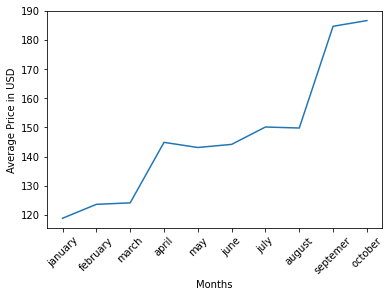

In [25]:
plt.plot(month_price_avg_df.month, month_price_avg_df.avg_price);
plt.xticks(rotation=45);
plt.xlabel("Months");
plt.ylabel("Average Price in USD");

It is evident that sep to october is the peak season with average price ranging from $185 to $187 and January to March are comparatively lower with average price ranging from $119 to $124